In [1]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r'D:\shinu\stockPredictor\newsSentiments.csv', encoding = "ISO-8859-1")
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,headline,label
0,Huaweis New Android Phone Lacks Luster Without...,1
1,ATT Extends 5G Leadership Across the US,0
2,The Namewashing of Public Transit,1
3,Disney Hit 10 Million SignUps at Its Launch Bu...,-1
4,Black Friday and Cyber Monday at Verizon The b...,0


In [3]:
dataset.shape

(55, 2)

In [4]:
dataset = dataset[['label','headline']]
dataset.head()

,label,headline
0,1,Huaweis New Android Phone Lacks Luster Without...
1,0,ATT Extends 5G Leadership Across the US
2,1,The Namewashing of Public Transit
3,-1,Disney Hit 10 Million SignUps at Its Launch Bu...
4,0,Black Friday and Cyber Monday at Verizon The b...


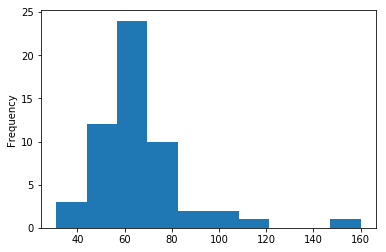

In [5]:
%matplotlib inline
dataset['headline'].str.len().plot.hist()

In [6]:
dataset['label'].value_counts()

 0    29
-1    19
 1     7
Name: label, dtype: int64

In [7]:
dataset['label'].value_counts()

 0    29
-1    19
 1     7
Name: label, dtype: int64

In [8]:
dataset['headline'].apply(lambda x: x.lower())
dataset['headline'] = dataset['headline'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]',"",x))
dataset['headline'].head()

0    Huaweis New Android Phone Lacks Luster Without...
1              ATT Extends 5G Leadership Across the US
2                    The Namewashing of Public Transit
3    Disney Hit 10 Million SignUps at Its Launch Bu...
4    Black Friday and Cyber Monday at Verizon The b...
Name: headline, dtype: object

In [9]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(dataset['headline'].values)

X = tokenizer.texts_to_sequences(dataset['headline'].values)
X = pad_sequences(X)
X[:7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  99,  24, 100,  25, 101, 102, 103, 104, 105],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   6, 106,   1, 107, 108,  11,  14],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  11, 109,   3, 110, 111],
       [  0,   0,   0,   0,   0,   0,   0,   0, 112, 113, 114,  47, 115,
         15,   7, 116, 117, 118, 119, 120, 121,  16,  48,  34, 122],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 123, 124,   8, 125,  35,  15,   5,  11, 126,  36, 127],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   5,  26,   8, 128, 129, 130,  49, 131],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 132,   1,   2,
        133,   3, 134,  37,  50,   8,  51,  10,  38, 135,   3,  27]])

In [10]:
X.shape

(55, 25)

In [11]:
model = Sequential()
model.add(Embedding(5000, 256, input_length = X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout = 0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout =0.2))
model.add(Dense(3, activation = 'softmax'))

W1127 15:10:31.824625 16628 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1127 15:10:31.840583 16628 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1127 15:10:31.844542 16628 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1127 15:10:31.855513 16628 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1127 15:10:31.862493 16628 deprecation.py:506] From D:\Anaconda3\lib\site-packages\keras\back

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W1127 15:10:32.463914 16628 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1127 15:10:32.487843 16628 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [13]:
y = pd.get_dummies(dataset['label']).values
[print(dataset['label'][i], y[i]) for i in range(0,7)]

1 [0 0 1]
0 [0 1 0]
1 [0 0 1]
-1 [1 0 0]
0 [0 1 0]
0 [0 1 0]
-1 [1 0 0]


[None, None, None, None, None, None, None]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
X_test[:7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  21,  83,  84,  85,  86,   4,  14,  87],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45,
         66,   9,   5,  18,   1,   8, 265,   9,   7, 266,  18, 267],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  26,  92,  46,  27,  93,  94,  95,  32,  33,  96],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   6,  29, 231,   1,  22, 232],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,  68,
         36,  30,   2,  20,  69,  43,   9,  14,  30,  15,  24,  70],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  11, 109,   3, 110, 111],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   5,  45,   2, 261,   1, 262, 263, 264]])

In [16]:
batch_size = 64
epochs = 50
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=2)
scores=model.evaluate(X_test,y_test, verbose=2)
print("Accuracy: %.2f%%" %(scores[1]*100))

W1127 15:10:32.651414 16628 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
 - 2s - loss: 1.0992 - acc: 0.2500
Epoch 2/50
 - 0s - loss: 1.0795 - acc: 0.4773
Epoch 3/50
 - 0s - loss: 1.0485 - acc: 0.5000
Epoch 4/50
 - 0s - loss: 0.9852 - acc: 0.4773
Epoch 5/50
 - 0s - loss: 0.9335 - acc: 0.4773
Epoch 6/50
 - 0s - loss: 1.0122 - acc: 0.4773
Epoch 7/50
 - 0s - loss: 0.9201 - acc: 0.6818
Epoch 8/50
 - 0s - loss: 0.9210 - acc: 0.5682
Epoch 9/50
 - 0s - loss: 0.9183 - acc: 0.4318
Epoch 10/50
 - 0s - loss: 0.9011 - acc: 0.7273
Epoch 11/50
 - 0s - loss: 0.8846 - acc: 0.7500
Epoch 12/50
 - 0s - loss: 0.8421 - acc: 0.6818
Epoch 13/50
 - 0s - loss: 0.7984 - acc: 0.6591
Epoch 14/50
 - 0s - loss: 0.7631 - acc: 0.6591
Epoch 15/50
 - 0s - loss: 0.7092 - acc: 0.7045
Epoch 16/50
 - 0s - loss: 0.6234 - acc: 0.7955
Epoch 17/50
 - 0s - loss: 0.5609 - acc: 0.8636
Epoch 18/50
 - 0s - loss: 0.4984 - acc: 0.8409
Epoch 19/50
 - 0s - loss: 0.4374 - acc: 0.7727
Epoch 20/50
 - 0s - loss: 0.3808 - acc: 0.8409
Epoch 21/50
 - 0s - loss: 0.3022 - acc: 0.9091
Epoch 22/50
 - 0s - lo

In [17]:
model.save(r'C:\Users\samir\Desktop\Devops\Sentiment_Model.h5')

In [18]:
prediction = model.predict(X_test)

#[print(dataset['text'][i], prediction[i], y_test[i]) for i in range(0,7)]
for i in range(0,7):
    print(dataset['headline'][i])
    if(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==0):
        print("POSITIVE")
    elif(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==1):
        print("NEUTRAL")
    elif(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==2):
        print("NEGATIVE")

Huaweis New Android Phone Lacks Luster Without Google Apps
NEGATIVE
ATT Extends 5G Leadership Across the US
NEUTRAL
The Namewashing of Public Transit
POSITIVE
Disney Hit 10 Million SignUps at Its Launch But That Number Might Not Be All It Appears
NEGATIVE
Black Friday and Cyber Monday at Verizon The best tech deals
NEGATIVE
Verizon Qualcomm and Ericsson demonstrate Dynamic Spectrum Sharing
NEGATIVE
ATT pushing 5G to tens of millions this year and nationwide in first half of 2020
NEGATIVE
